#  Using a default LGBMRegressoe,i achive an R2 score of 0.80 after turning hyperparameter with GridSearchCV,the score improved significantly to 0.90-highlighting the impact of model optimization.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/boston.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]


print(df.head())
print(df.shape)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)


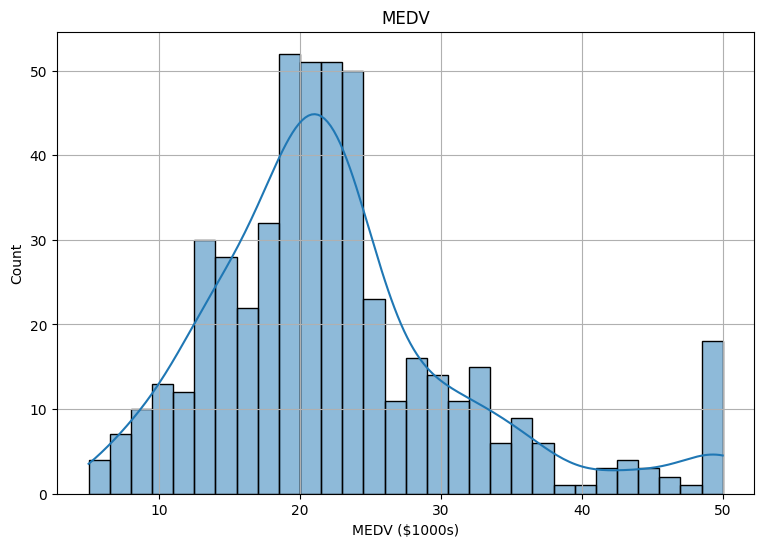

In [5]:
plt.figure(figsize=(9, 6))
sns.histplot(df["MEDV"], bins=30, kde=True)
plt.title("MEDV")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


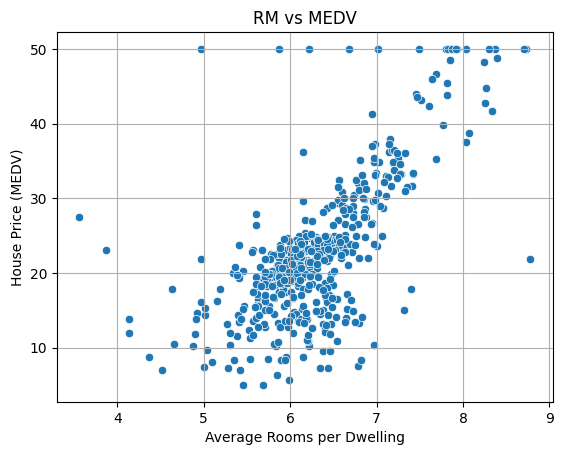

In [6]:
sns.scatterplot(x="RM", y="MEDV", data=df)
plt.title("RM vs MEDV")
plt.xlabel("Average Rooms per Dwelling")
plt.ylabel("House Price (MEDV)")
plt.grid(True)
plt.show()

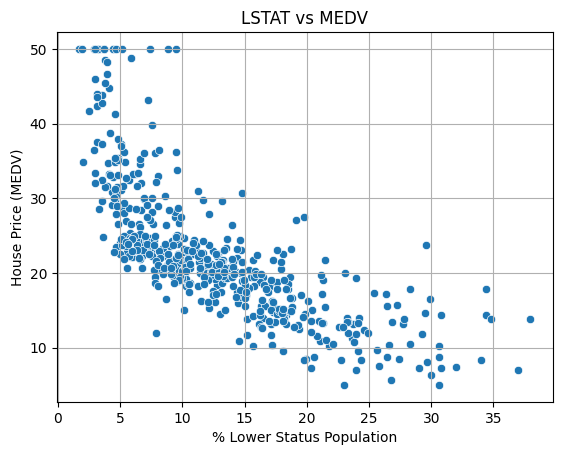

In [ ]:
sns.scatterplot(x="LSTAT", y="MEDV", data=df)
plt.title("LSTAT vs MEDV")
plt.xlabel("% Lower Status Population")
plt.ylabel("House Price (MEDV)")
plt.grid(True)
plt.show()


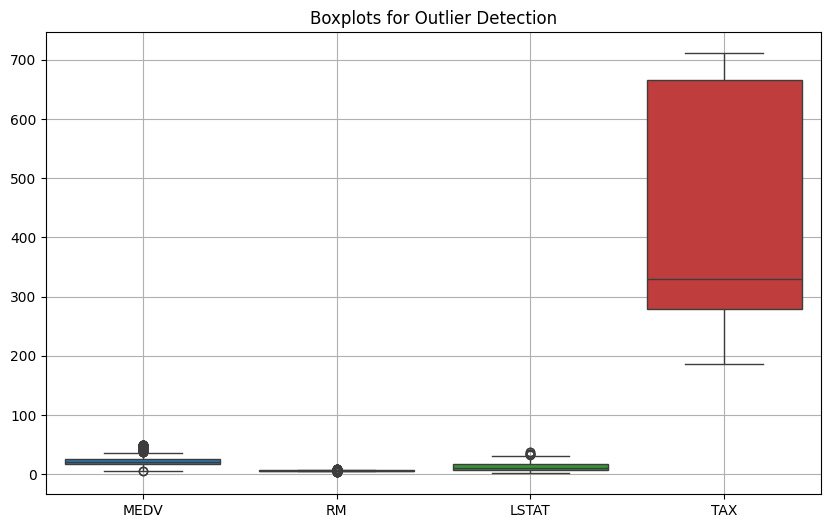

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["MEDV", "RM", "LSTAT", "TAX"]])
plt.title("Boxplots for Outlier Detection")
plt.grid(True)
plt.show()

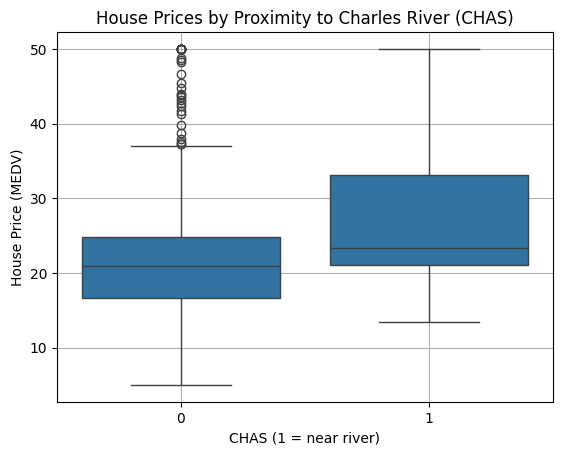

In [ ]:
sns.boxplot(x="CHAS", y="MEDV", data=df)
plt.title("House Prices by Proximity to Charles River (CHAS)")
plt.xlabel("CHAS (1 = near river)")
plt.ylabel("House Price (MEDV)")
plt.grid(True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [10]:
# Split data into features and target

X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [11]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize and train model
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LGBMRegressor()
parm_grid = {
    'num_leaves': [20,31,50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [ 200, 300,400],
    'max_depth': [5, 10,15,-1],
    'min_child_samples': [10,20, 30]
}
grid = GridSearchCV(estimator=lr, param_grid=parm_grid, cv=5,n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Best:",grid.best_params_)
print(best_model)
preds= best_model.predict(X_test)
mse=mean_squared_error(y_test,preds)
r2=r2_score(y_test,preds)
print("MSE:",mse)
print("R2:",r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.796535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [15]:
import numpy as np

# Example random input values (in the same order as features)
new_data = np.array([[0.1, 18.0, 2.3, 0, 0.5, 6.5, 60.0, 4.0, 1, 300, 15.0, 390.0, 5.0]])

# Predict using trained model
predicted_price = best_model.predict(new_data)

print("Predicted MEDV (House Price):", predicted_price[0])


Predicted MEDV (House Price): 30.57526955834754


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
import joblib

In [17]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [18]:
import pandas as pd
import joblib
import gradio as gr
model=joblib.load('/content/model.pkl')
feature_names= ['CRIM','ZIN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTARTIO','B','LSTAT']
def predict_price(*inputs):
  input_df=pd.DataFrame([inputs],columns=feature_names)
  prediction =model.predict(input_df)[0] *1000
  return f"${prediction:,.2f}"
inputs =[gr.Number(label=col) for col in feature_names]
interface= gr.Interface(
      fn=predict_price,
      inputs=inputs,
      outputs="text",
      title="Housing price"
  )
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9e342ea48eb6395127.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
